In [1]:
import torch
import numpy as np
from model.models import UNet, UNetAttention, DoubleConv, UpSample, UNet_basic
from data.data import InvERTDataset
from pathlib import Path
from json5 import load as json_load
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.axes._axes import Axes
from matplotlib.colors import LogNorm, Normalize
from collections import OrderedDict

In [2]:
def detransform(log_res: float | np.ndarray[float]) -> float | np.ndarray[float]:
    return 2 * 10 ** (4 * log_res)

In [3]:
# experiment_path = Path("/mnt/ensg/tout_le_monde/Basile/results/weighted_bs_32_abs_18-04-2025_14h41")
experiment_path = Path("/home/labo3A/results/u_net_23-04-2025_13h56")

In [4]:
class Transform:
    def __init__(self):
        pass

    def __call__(self, sample):
        sample['pseudosection'] = sample['pseudosection'].unsqueeze(0)

        pseudosection = sample['pseudosection']
        num_electrode_channel = torch.ones_like(pseudosection) * sample['num_electrode']
        subsection_length_channel = torch.ones_like(pseudosection) * sample['subsection_length']
        array_type_channel = sample['array_type']
        array_type_channel = array_type_channel.view(-1, 1, 1).expand(-1, pseudosection.shape[1], pseudosection.shape[2])
        sample['pseudosection'] = torch.cat((pseudosection, num_electrode_channel, subsection_length_channel, array_type_channel), dim=0)
        
        sample['norm_log_resistivity_model'] = sample['norm_log_resistivity_model'].unsqueeze(0)
        sample['JtJ_diag'] = sample['JtJ_diag'].unsqueeze(0)
        # sample['JtJ_diag'] = torch.ones_like(sample['JtJ_diag'])
        
        return sample

In [ ]:
model_ckpt_path = experiment_path / "figures/model_output/checkpoints"
model_ckpt_list = sorted(model_ckpt_path.glob("*.pth"), key=lambda x: int(x.stem.split("_")[-1]))
print(f"Found {len(model_ckpt_list)} checkpoints, last one is {model_ckpt_list[-1].stem}")
model = UNet()
model.load_state_dict(torch.load(model_ckpt_list[-1], map_location='cpu')['model_state_dict'])
model.eval()

Found 20 checkpoints, last one is model_epoch_20


RuntimeError: Error(s) in loading state_dict for UNet_basic:
	Missing key(s) in state_dict: "conv_block1.0.weight", "conv_block1.0.bias", "conv_block1.1.weight", "conv_block1.1.bias", "conv_block1.1.running_mean", "conv_block1.1.running_var", "conv_block2.0.weight", "conv_block2.0.bias", "conv_block2.1.weight", "conv_block2.1.bias", "conv_block2.1.running_mean", "conv_block2.1.running_var", "mlp.0.weight", "mlp.0.bias", "mlp.2.weight", "mlp.2.bias", "mlp.4.weight", "mlp.4.bias", "upconv1.0.weight", "upconv1.0.bias", "upconv1.1.weight", "upconv1.1.bias", "upconv1.1.running_mean", "upconv1.1.running_var", "upconv2.0.weight", "upconv2.0.bias", "upconv2.1.weight", "upconv2.1.bias", "upconv2.1.running_mean", "upconv2.1.running_var", "upconv3.0.weight", "upconv3.0.bias", "upconv3.1.weight", "upconv3.1.bias", "upconv3.1.running_mean", "upconv3.1.running_var", "upconv4.0.weight", "upconv4.0.bias", "upconv4.1.weight", "upconv4.1.bias", "upconv4.1.running_mean", "upconv4.1.running_var", "upconv5.0.weight", "upconv5.0.bias", "upconv5.1.weight", "upconv5.1.bias", "upconv5.1.running_mean", "upconv5.1.running_var". 
	Unexpected key(s) in state_dict: "downs.0.double_conv.0.weight", "downs.0.double_conv.1.weight", "downs.0.double_conv.1.bias", "downs.0.double_conv.1.running_mean", "downs.0.double_conv.1.running_var", "downs.0.double_conv.1.num_batches_tracked", "downs.0.double_conv.3.weight", "downs.0.double_conv.4.weight", "downs.0.double_conv.4.bias", "downs.0.double_conv.4.running_mean", "downs.0.double_conv.4.running_var", "downs.0.double_conv.4.num_batches_tracked", "downs.1.double_conv.0.weight", "downs.1.double_conv.1.weight", "downs.1.double_conv.1.bias", "downs.1.double_conv.1.running_mean", "downs.1.double_conv.1.running_var", "downs.1.double_conv.1.num_batches_tracked", "downs.1.double_conv.3.weight", "downs.1.double_conv.4.weight", "downs.1.double_conv.4.bias", "downs.1.double_conv.4.running_mean", "downs.1.double_conv.4.running_var", "downs.1.double_conv.4.num_batches_tracked", "downs.2.double_conv.0.weight", "downs.2.double_conv.1.weight", "downs.2.double_conv.1.bias", "downs.2.double_conv.1.running_mean", "downs.2.double_conv.1.running_var", "downs.2.double_conv.1.num_batches_tracked", "downs.2.double_conv.3.weight", "downs.2.double_conv.4.weight", "downs.2.double_conv.4.bias", "downs.2.double_conv.4.running_mean", "downs.2.double_conv.4.running_var", "downs.2.double_conv.4.num_batches_tracked", "downs.3.double_conv.0.weight", "downs.3.double_conv.1.weight", "downs.3.double_conv.1.bias", "downs.3.double_conv.1.running_mean", "downs.3.double_conv.1.running_var", "downs.3.double_conv.1.num_batches_tracked", "downs.3.double_conv.3.weight", "downs.3.double_conv.4.weight", "downs.3.double_conv.4.bias", "downs.3.double_conv.4.running_mean", "downs.3.double_conv.4.running_var", "downs.3.double_conv.4.num_batches_tracked", "downs.4.double_conv.0.weight", "downs.4.double_conv.1.weight", "downs.4.double_conv.1.bias", "downs.4.double_conv.1.running_mean", "downs.4.double_conv.1.running_var", "downs.4.double_conv.1.num_batches_tracked", "downs.4.double_conv.3.weight", "downs.4.double_conv.4.weight", "downs.4.double_conv.4.bias", "downs.4.double_conv.4.running_mean", "downs.4.double_conv.4.running_var", "downs.4.double_conv.4.num_batches_tracked", "bottleneck.double_conv.0.weight", "bottleneck.double_conv.1.weight", "bottleneck.double_conv.1.bias", "bottleneck.double_conv.1.running_mean", "bottleneck.double_conv.1.running_var", "bottleneck.double_conv.1.num_batches_tracked", "bottleneck.double_conv.3.weight", "bottleneck.double_conv.4.weight", "bottleneck.double_conv.4.bias", "bottleneck.double_conv.4.running_mean", "bottleneck.double_conv.4.running_var", "bottleneck.double_conv.4.num_batches_tracked", "ups.0.upsample.1.weight", "ups.0.upsample.1.bias", "ups.0.upsample.2.weight", "ups.0.upsample.2.bias", "ups.0.upsample.2.running_mean", "ups.0.upsample.2.running_var", "ups.0.upsample.2.num_batches_tracked", "ups.1.double_conv.0.weight", "ups.1.double_conv.1.weight", "ups.1.double_conv.1.bias", "ups.1.double_conv.1.running_mean", "ups.1.double_conv.1.running_var", "ups.1.double_conv.1.num_batches_tracked", "ups.1.double_conv.3.weight", "ups.1.double_conv.4.weight", "ups.1.double_conv.4.bias", "ups.1.double_conv.4.running_mean", "ups.1.double_conv.4.running_var", "ups.1.double_conv.4.num_batches_tracked", "ups.2.upsample.1.weight", "ups.2.upsample.1.bias", "ups.2.upsample.2.weight", "ups.2.upsample.2.bias", "ups.2.upsample.2.running_mean", "ups.2.upsample.2.running_var", "ups.2.upsample.2.num_batches_tracked", "ups.3.double_conv.0.weight", "ups.3.double_conv.1.weight", "ups.3.double_conv.1.bias", "ups.3.double_conv.1.running_mean", "ups.3.double_conv.1.running_var", "ups.3.double_conv.1.num_batches_tracked", "ups.3.double_conv.3.weight", "ups.3.double_conv.4.weight", "ups.3.double_conv.4.bias", "ups.3.double_conv.4.running_mean", "ups.3.double_conv.4.running_var", "ups.3.double_conv.4.num_batches_tracked", "ups.4.upsample.1.weight", "ups.4.upsample.1.bias", "ups.4.upsample.2.weight", "ups.4.upsample.2.bias", "ups.4.upsample.2.running_mean", "ups.4.upsample.2.running_var", "ups.4.upsample.2.num_batches_tracked", "ups.5.double_conv.0.weight", "ups.5.double_conv.1.weight", "ups.5.double_conv.1.bias", "ups.5.double_conv.1.running_mean", "ups.5.double_conv.1.running_var", "ups.5.double_conv.1.num_batches_tracked", "ups.5.double_conv.3.weight", "ups.5.double_conv.4.weight", "ups.5.double_conv.4.bias", "ups.5.double_conv.4.running_mean", "ups.5.double_conv.4.running_var", "ups.5.double_conv.4.num_batches_tracked", "ups.6.upsample.1.weight", "ups.6.upsample.1.bias", "ups.6.upsample.2.weight", "ups.6.upsample.2.bias", "ups.6.upsample.2.running_mean", "ups.6.upsample.2.running_var", "ups.6.upsample.2.num_batches_tracked", "ups.7.double_conv.0.weight", "ups.7.double_conv.1.weight", "ups.7.double_conv.1.bias", "ups.7.double_conv.1.running_mean", "ups.7.double_conv.1.running_var", "ups.7.double_conv.1.num_batches_tracked", "ups.7.double_conv.3.weight", "ups.7.double_conv.4.weight", "ups.7.double_conv.4.bias", "ups.7.double_conv.4.running_mean", "ups.7.double_conv.4.running_var", "ups.7.double_conv.4.num_batches_tracked", "ups.8.upsample.1.weight", "ups.8.upsample.1.bias", "ups.8.upsample.2.weight", "ups.8.upsample.2.bias", "ups.8.upsample.2.running_mean", "ups.8.upsample.2.running_var", "ups.8.upsample.2.num_batches_tracked", "ups.9.double_conv.0.weight", "ups.9.double_conv.1.weight", "ups.9.double_conv.1.bias", "ups.9.double_conv.1.running_mean", "ups.9.double_conv.1.running_var", "ups.9.double_conv.1.num_batches_tracked", "ups.9.double_conv.3.weight", "ups.9.double_conv.4.weight", "ups.9.double_conv.4.bias", "ups.9.double_conv.4.running_mean", "ups.9.double_conv.4.running_var", "ups.9.double_conv.4.num_batches_tracked". 
	size mismatch for final_conv.weight: copying a param with shape torch.Size([1, 16, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 8, 1, 1]).

In [41]:
with open(experiment_path / 'config.json5', mode='r', encoding="utf8") as config_file:
    config_dict = json_load(config_file)

dataset = InvERTDataset(
    Path(config_dict['dataset']['dataset_name']),
    transform=Transform(),
)
dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=1,
    shuffle=True,
    num_workers=0,
)

DATASET: Found 18193 samples in /home/labo3A/samples_normalized.


In [ ]:
sample = next(iter(dataloader))

num_electrodes = int(sample['num_electrode'] * 72 + 24)
array_type = sample['array_type']
pseudosection = sample['pseudosection']
norm_log_resistivity_model = sample['norm_log_resistivity_model']
JtJ_diag = sample['JtJ_diag']

print(f"num_electrodes: {num_electrodes}")
print(f"array_type: {array_type}")
print(f"pseudosection.shape: {pseudosection.shape}")
print(f"norm_log_resistivity_model.shape: {norm_log_resistivity_model.shape}")
print(f"JtJ_diag.shape: {JtJ_diag.shape}")


# output = model(pseudosection, norm_log_resistivity_model)

# pseudosection_np = pseudosection[0, 0].detach().numpy()
# pseudosection_np[pseudosection_np == 0] = np.nan

# fig, axes = plt.subplots(1, 3, figsize=(15, 3))
# im0 = axes[0].imshow(pseudosection_np, cmap='viridis')
# axes[0].set_title("Pseudosection")
# axes[0].set_xlabel("Horizontal direction")
# axes[0].set_ylabel("Pseudodepth")
# cbar0 = fig.colorbar(im0, ax=axes[0], orientation='vertical')
# cbar0.set_label('Normalized apparent resistivity')

# vmin = min(torch.min(norm_log_resistivity_model).item(), torch.min(output).item())
# vmax = max(torch.max(norm_log_resistivity_model).item(), torch.max(output).item())
# norm = Normalize(vmin=vmin, vmax=vmax)
# im1 = axes[1].imshow(norm_log_resistivity_model[0, 0].detach().numpy(), cmap='viridis', norm=norm)
# axes[1].set_title("Log resistivity model")
# axes[1].set_xlabel("Horizontal direction (pixels)")
# axes[1].set_ylabel("Depth (pixels)")
# cbar1 = fig.colorbar(im1, ax=axes[1], orientation='vertical')
# cbar1.set_label('Normalized resistivity')
# im2 = axes[2].imshow(output[0, 0].detach().numpy(), cmap='viridis', norm=norm)
# axes[2].set_title("Model output")
# axes[2].set_xlabel("Horizontal direction (pixels)")
# axes[2].set_ylabel("Depth (pixels)")
# cbar2 = fig.colorbar(im2, ax=axes[2], orientation='vertical')
# cbar2.set_label('Normalized resistivity')
# plt.tight_layout()
# plt.show()

num_electrodes: 37
array_type: tensor([[0, 1]], dtype=torch.int32)
pseudosection.shape: torch.Size([1, 5, 17, 34])
norm_log_resistivity_model.shape: torch.Size([1, 1, 172, 230])
JtJ_diag.shape: torch.Size([1, 1, 172, 230])


In [43]:
if 'handles' in locals():
    for handle in handles:
        handle.remove()
    del handles

activation = {}
def get_activation(name):
    def hook(module, input, output_inter):
        activation[name] = output_inter.detach().clone()
    return hook

handles = [] # Store handles to remove later if needed
for name, module in model.named_modules():
    if (
        isinstance(module, torch.nn.modules.container.ModuleList)
        or isinstance(module, torch.nn.Sequential)
        or isinstance(module, torch.nn.modules.batchnorm.BatchNorm2d)
        or isinstance(module, DoubleConv)
        or isinstance(module, UpSample)
        or isinstance(module, UNet)
    ):
        continue
    print(name, type(module))
    handle = module.register_forward_hook(get_activation(name))
    handles.append(handle)


downs.0.double_conv.0 <class 'torch.nn.modules.conv.Conv2d'>
downs.0.double_conv.2 <class 'torch.nn.modules.activation.ReLU'>
downs.0.double_conv.3 <class 'torch.nn.modules.conv.Conv2d'>
downs.0.double_conv.5 <class 'torch.nn.modules.activation.ReLU'>
downs.1.double_conv.0 <class 'torch.nn.modules.conv.Conv2d'>
downs.1.double_conv.2 <class 'torch.nn.modules.activation.ReLU'>
downs.1.double_conv.3 <class 'torch.nn.modules.conv.Conv2d'>
downs.1.double_conv.5 <class 'torch.nn.modules.activation.ReLU'>
downs.2.double_conv.0 <class 'torch.nn.modules.conv.Conv2d'>
downs.2.double_conv.2 <class 'torch.nn.modules.activation.ReLU'>
downs.2.double_conv.3 <class 'torch.nn.modules.conv.Conv2d'>
downs.2.double_conv.5 <class 'torch.nn.modules.activation.ReLU'>
downs.3.double_conv.0 <class 'torch.nn.modules.conv.Conv2d'>
downs.3.double_conv.2 <class 'torch.nn.modules.activation.ReLU'>
downs.3.double_conv.3 <class 'torch.nn.modules.conv.Conv2d'>
downs.3.double_conv.5 <class 'torch.nn.modules.activation

In [44]:
with torch.no_grad(): # Good practice for inference/activation extraction
    output = model(pseudosection, norm_log_resistivity_model)

output_np = output.squeeze().detach().numpy()
dnn_resistivity_model = detransform(output_np)

print(f"Length of actvivation: {len(activation)}")

ordered_activation = OrderedDict()
for name, _ in model.named_modules():
    if name in activation:
        ordered_activation[name] = activation[name]

Length of actvivation: 61


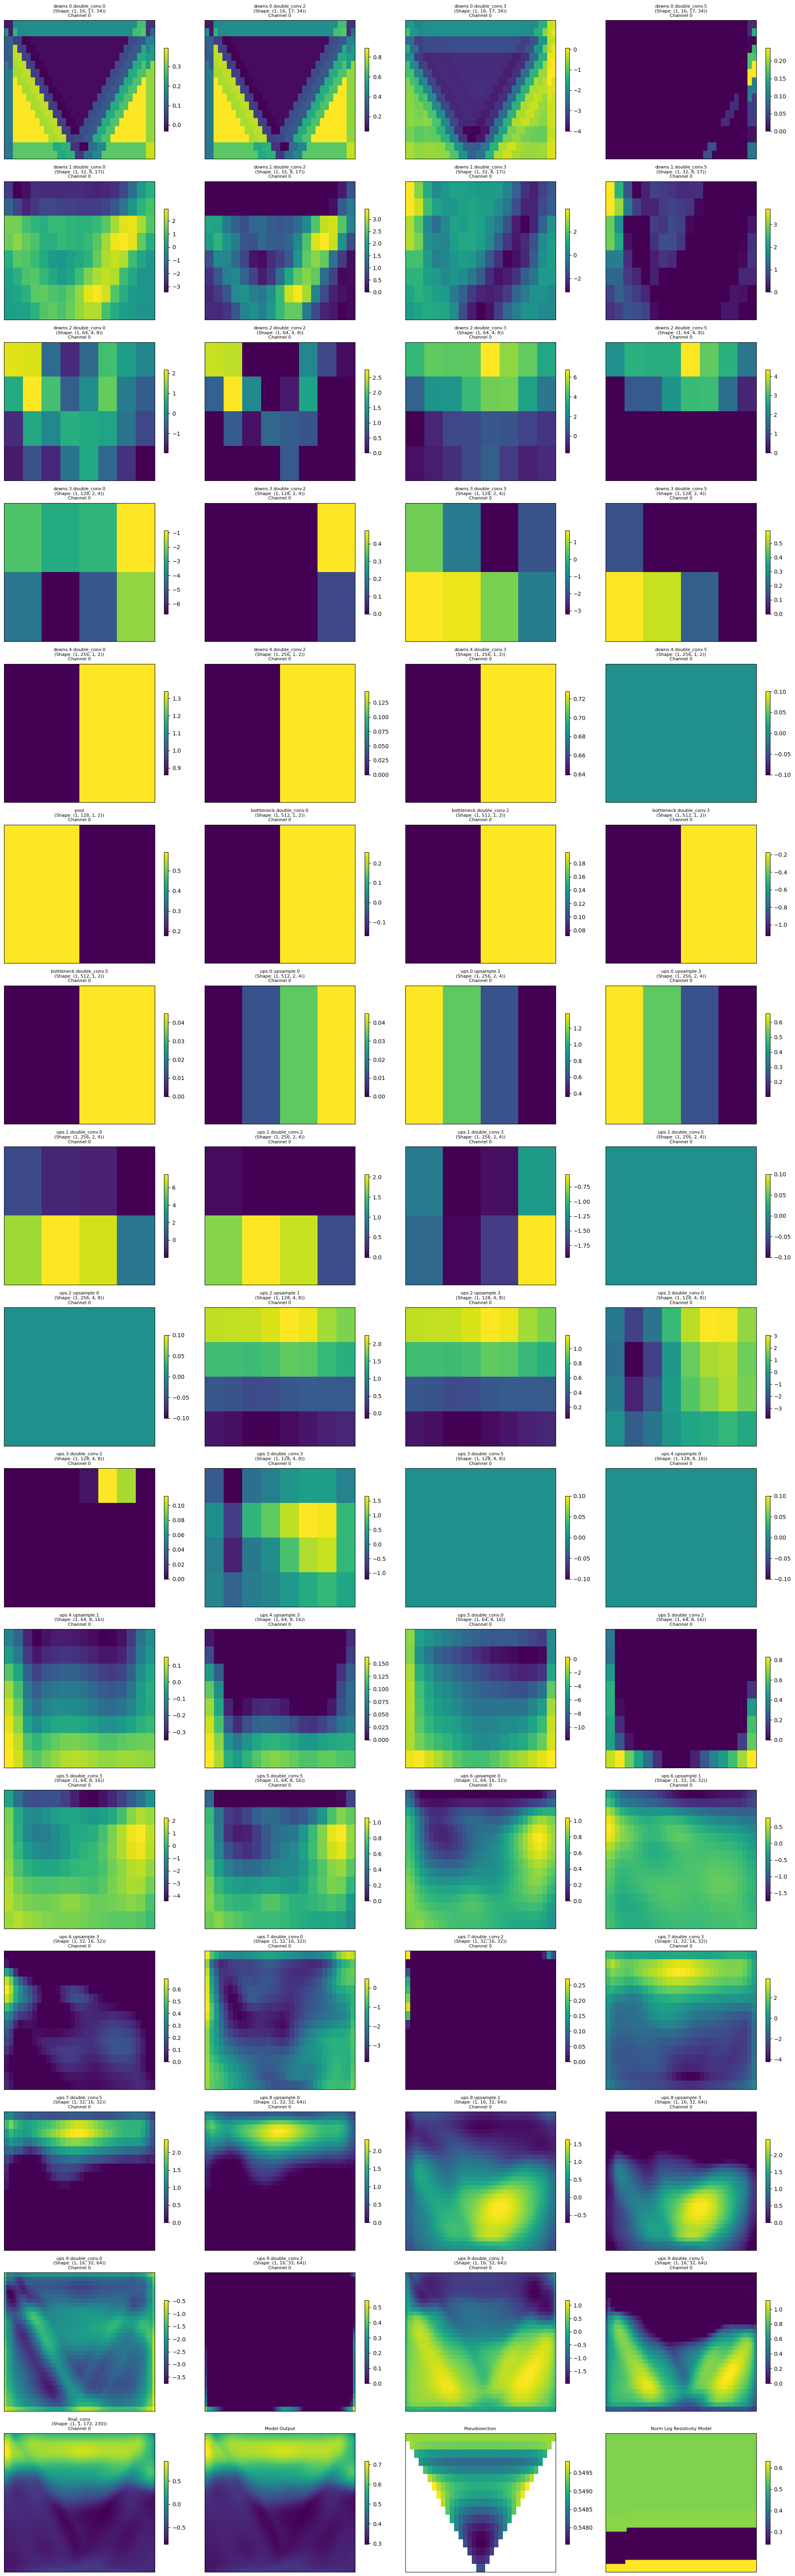

In [45]:
if not ordered_activation:
    print("Activation dictionary is empty. No plots generated.")
else:
    num_figs = len(ordered_activation) # No need to add +2 unless plotting inputs separately
    num_cols = 4
    num_rows = (num_figs + num_cols - 1) // num_cols # Ceiling division

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4), squeeze=False) # Adjust figsize, use squeeze=False
    axes = axes.ravel() # Flatten axes array for easy indexing

    plot_idx = 0
    for name, act in ordered_activation.items():
        if plot_idx >= len(axes):
            print(f"Warning: More activations ({num_figs}) than plot slots ({len(axes)}). Stopping plotting.")
            break

        ax = axes[plot_idx]
        if isinstance(act, torch.Tensor):
            # Move to CPU before converting to numpy
            act_np = act.cpu().numpy()

            # Handle different dimensions more carefully
            if act_np.ndim == 4: # (B, C, H, W) - plot first channel of first batch item
                if act_np.shape[0] > 0 and act_np.shape[1] > 0:
                    img_data = act_np[0, 0, :, :]
                    title = f"{name}\n(Shape: {act_np.shape})\nChannel 0"
                else:
                    img_data = None # Cannot plot empty tensor
                    title = f"{name}\n(Empty Tensor)"
            elif act_np.ndim == 3: # (B, H, W) or (C, H, W) - plot first slice
                 if act_np.shape[0] > 0:
                     img_data = act_np[0, :, :]
                     title = f"{name}\n(Shape: {act_np.shape})\nSlice 0"
                 else:
                     img_data = None
                     title = f"{name}\n(Empty Tensor)"
            elif act_np.ndim == 2: # (H, W) or (B, Features)
                img_data = act_np
                title = f"{name}\n(Shape: {act_np.shape})"
            elif act_np.ndim == 1: # (Features,) - Cannot imshow directly
                 print(f"Skipping plot for 1D tensor: {name} (Shape: {act_np.shape})")
                 title = f"{name}\n(1D Tensor)"
                 img_data = None
            else:
                 print(f"Skipping plot for tensor with ndim {act_np.ndim}: {name}")
                 title = f"{name}\n(ndim={act_np.ndim})"
                 img_data = None

            if img_data is not None and img_data.size > 0: # Check if plottable data exists
                 im = ax.imshow(img_data, cmap='viridis', aspect='auto')
                 fig.colorbar(im, ax=ax, shrink=0.6) # Adjust colorbar size if needed
                 ax.set_title(title, fontsize=8) # Adjust font size
            else:
                 ax.set_title(title, fontsize=8)
                 ax.text(0.5, 0.5, 'No plottable data', ha='center', va='center')

        else:
             # Handle cases where activation might not be a tensor (less common with hooks)
             ax.set_title(f"{name}\n(Not a Tensor)")
             ax.text(0.5, 0.5, f'Type: {type(act)}', ha='center', va='center')

        ax.set_xticks([]) # Hide ticks for clarity
        ax.set_yticks([])
        plot_idx += 1
    
    ax = axes[plot_idx]
    output_np = output.squeeze().detach().numpy()
    im = ax.imshow(output_np, cmap='viridis', aspect='auto')
    fig.colorbar(im, ax=ax, shrink=0.6)
    ax.set_title("Model Output", fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])
    plot_idx += 1

    ax = axes[plot_idx]
    pseudosection_np = pseudosection.squeeze().detach().numpy()[0, :, :]
    pseudosection_np[pseudosection_np == 0] = np.nan
    im = ax.imshow(pseudosection_np, cmap='viridis', aspect='auto')
    fig.colorbar(im, ax=ax, shrink=0.6)
    ax.set_title("Pseudosection", fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])
    plot_idx += 1

    ax = axes[plot_idx]
    norm_log_resistivity_model_np = norm_log_resistivity_model.squeeze().detach().numpy()[:, :]
    im = ax.imshow(norm_log_resistivity_model_np, cmap='viridis', aspect='auto')
    fig.colorbar(im, ax=ax, shrink=0.6)
    ax.set_title("Norm Log Resistivity Model", fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])
    plot_idx += 1

    # Hide any unused subplots
    for i in range(plot_idx, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()